In [58]:
import jieba
import requests
import numpy as np
import pandas as pd
from lxml import etree
from bs4 import BeautifulSoup
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textrank4zh import TextRank4Keyword, TextRank4Sentence

或者使用
soup = BeautifulSoup(content, 'html.parser', from_encoding='utf-8')
text = soup.get_text()

In [80]:
url = 'https://news.sina.com.cn/w/2020-12-10/doc-iiznezxs6126218.shtml'
headers={'user-agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.131 Safari/537.36'}
html=requests.get(url, headers=headers, timeout=10)
content = html.content
res_elements = etree.HTML(content)
article = res_elements.xpath('//div[@id="article"]')
text = etree.tostring(article[0],encoding='utf-8').decode()
text = re.sub("<!--article_adlist(.*?)article_adlist-->","",text)
text = re.sub('[^\u4e00-\u9fa5。，！：、]{7,}', '', text)
print(text)

原标题：最震撼一幕，默克尔情绪近乎失控！节目列表小图播放器上视频还未开始播显示的图片，可与pic相同默克尔情绪近乎失控#  劝国民遵守防疫措施 减少接触',	//标题视频发布来源。如：新华网。播放器外层在世界领导人中，默克尔应该是最沉得住气的一位女政治家。哪怕遭到特朗普各种羞辱痛批，她的回应，也只是默默贴出一张“六大门派围攻光明顶”的照片。但一大早醒来，看到默克尔最新演讲的一则短视频，确实非常非常震撼。这应该执政15年来，默克尔言辞最震撼、情绪最激动的一次演讲，说到痛心处，她双手合十，似乎在祈祷，有时几乎声泪俱下，近乎失控。视频不长，哪怕你不会德语，相信看完，你也能感受到默克尔的痛心和焦虑。这是昨天（12月9日）在德国议会的演讲，身着红色上装的默克尔大声疾呼：对不起，我真的很抱歉，发自内心。但如果我们付出的代价，是每天590人死亡，那这是不可接受的。看新闻，就在默克尔演讲前的24小时，德国死亡人数，突然暴增到590人。要知道，今年春天，德国还被认为是抗疫的模范生；哪知道到了秋冬季，德国发现自己也陷入了可怕的危机中。什么原因最重要的，应该还是隔离不够、接触太多。德国人不喜欢呆在家里，尤其是年轻人，他们喜欢酒吧、喜欢聚会。接下来就是圣诞假期，肯定是家人朋友间更多的密切接触。但在这个非常时期，对年迈的德国祖父母们来说，却可能是一场灾难。所以，默克尔警告：我只想说，如果我们现在接触太多，在圣诞节前夕，而这最后是和祖父母们在一起的最后一个圣诞节，那么我们就做错了什么。我们不应该让这种事发生。看她讲话时，几乎已经是哀求的口吻。有的时候，感觉就要哭出来了。也难怪德国《图片报》评价，这是默克尔担任德国总理15年来，最牵动人心的一次讲话。议员们一阵阵响亮掌声，就是一个证明。因为这种讲话背后，我们可以感觉到，她有对民众生死的深刻焦虑，她对科学家建议的高度重视，她对决策代价的敢于担当。她就像一个祖父母们一样，再三叮嘱不听话的德国青年，千万别在外面转悠聚会了，回家好好呆着，这个假期，也千万别和祖父母们多接触。不要让这个圣诞节，成为你们和祖父母过的最后一个圣诞节！够狠，但也够正确！坦率地说，在当今的所有女性政治家中，默克尔确实也是最让人敬佩的一个。不仅是因为她掌握的权力，更多是因为她的作为，以及个人魅力。她是来自东德的物理学博士，最终成为德国总理，一干就是15年。今年非常时期，德国虽然也不容

In [93]:
# 去掉停用词
def remove_stop_words(f):
    stop_words = [line.strip() for line in open('stopword.txt',encoding='utf-8').readlines()]
    for stop_word in stop_words:
        f = f.replace(stop_word, '')
    return f

In [96]:
# 生成词云
def create_word_cloud(f):
    print('根据词频，开始生成词云!')
    f = remove_stop_words(f)
    jieba.add_word('默克尔')
    jieba.add_word('牛弹琴')
    seg_list = jieba.lcut(f)
    #cut_text = ' '.join(seg_list)
    #cut_text = word_tokenize(f)
    cut_text = " ".join(seg_list)

    wc = WordCloud(
        max_words=10,
        width=2000,
        height=1200,
        font_path = 'C:\\Users\\hsb-admin\\Desktop\\msyh.ttc'
    )
    wordcloud = wc.generate(cut_text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

根据词频，开始生成词云!


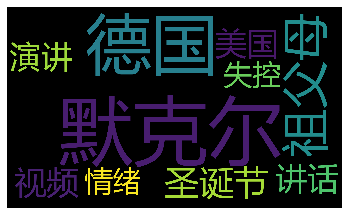

In [97]:
# 生成词云
create_word_cloud(text)

In [102]:
# 输出关键词，设置文本小写，窗口为2
tr4w = TextRank4Keyword()
tr4w.analyze(text=text, lower=True, window=5)
print('关键词：')
for item in tr4w.get_keywords(10, word_min_len=2):
    print(item.word, item.weight)

# 输出重要的句子
tr4s = TextRank4Sentence()
tr4s.analyze(text=text, lower=True, source = 'all_filters')
print('摘要：')
# 重要性较高的三个句子
for item in tr4s.get_key_sentences(num=3):
    # index是语句在文本中位置，weight表示权重
    print(item.index, item.weight, item.sentence)

关键词：
德国 0.01730408826040009
美国 0.012447639513620006
应该 0.010978117637564299
演讲 0.010914479493111806
视频 0.009752509686742756
接触 0.00888041216054074
全球 0.007709151862424067
德国总理 0.0063843080190749725
讲话 0.006284503615328582
女性 0.00615492003473604
摘要：
30 0.028240703910324474 今年非常时期，德国虽然也不容乐观，但肯定比美国英国处理得更好，很多人说，这还是要归功于默克尔，她本身就是一个科学家，她尊重科学
6 0.028008232675659425 这应该执政15年来，默克尔言辞最震撼、情绪最激动的一次演讲，说到痛心处，她双手合十，似乎在祈祷，有时几乎声泪俱下，近乎失控
10 0.024955388436345913 看新闻，就在默克尔演讲前的24小时，德国死亡人数，突然暴增到590人


In [125]:
import jieba.analyse as ana
'''
    可选参数说明: 
    - topK: 输出的关键词数量，如果是None则全部关键词都输出； 
    - withWeight: 输出的关键词是否附带textrank计算出来的权重值； 
    - allowPOS: 该参数为列表，表示仅显示符合该参数设置词性的关键词； 
    - withFlag: 输出的关键词是否附带词性;
'''
keyword = ana.textrank(text, topK=10)
print('textRank top 10 keyword:',format(keyword))
keyword = ana.tfidf(text,topK=10)
'''
    可选参数说明:
    - topK: 输出的关键词数量，如果是None则全部关键词都输出； 
    - withWeight: 输出的关键词是否附带textrank计算出来的权重值； 
    - allowPOS: 该参数为列表，表示仅显示符合该参数设置词性的关键词； 
    - withFlag: 输出的关键词是否附带词性;
'''
print('tfidf top 10 keyword:',format(keyword))

textRank top 10 keyword: ['德国', '应该', '美国', '演讲', '全球', '视频', '不能', '领导人', '失控', '来源']
tfidf top 10 keyword: ['默克尔', '祖父母', '德国', '圣诞节', '视频', '演讲', '失控', '15', '590', '讲话']


#从wordcloud词频,textRank,tfidf关键词对比来说，还是有些诧异，个人认为怎么感觉textRank统计的并不那么更贴合实际，这篇报道全篇将的的确是默克尔的
#发现jieba里面直接有接口可以计算textrank和tfidf然后输出top
#计算向量相似度milvus搜索引擎